In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn
import scipy
np.random.seed(0)

## Data loading

In [37]:
cycleA = pd.read_csv("Data/Chickens data/CycleA-CleanData211122.csv", sep=";")
cycleB = pd.read_csv("Data/Chickens data/CycleB-CleanData211122.csv", sep=";")
cycleZ = pd.read_csv("Data/Chickens data/CycleZ-CleanData221122.csv", sep=";")
temperature_data = pd.read_csv("Data/Meteorological data/temperature_goito.csv", sep=",")
rain_data = pd.read_csv("Data/Meteorological data/rain_goito.csv", sep=",")
humidity_data = pd.read_csv("Data/Meteorological data/humidity_ponte_sul_mincio.csv", sep=",")

## Data cleaning

In [38]:
# # removing rows with Nan values from chickens data
# cycleA = cycleA.dropna()
# cycleB = cycleB.dropna()
# # cycleZ = cycleZ.dropna()

# removing rows with non valid data from temperature_data
temperature_data = temperature_data[temperature_data["Avg_temp_value"] != -999.0]
#removing sensor id column
temperature_data.pop('Sensor_ID')
temperature_data.pop('Min_temp_value')
temperature_data.pop('Max_temp_value')

# removing rows with non valid data from humidity_data
humidity_data = humidity_data[humidity_data["Avg_humidity_value"] != -999.0]
#removing sensor id column
humidity_data.pop('Sensor_ID')
humidity_data.pop('Min_humidity_value')
humidity_data.pop('Max_humidity_value')

# modifying data format of chickens data for uniformity: YYYY/MM/DD
cycleA['Arrival Chickens Date'] = pd.to_datetime(cycleA["Arrival Chickens Date"], dayfirst=True).dt.strftime('%Y/%m/%d')
cycleA['Date of Laid'] = pd.to_datetime(cycleA["Date of Laid"], dayfirst=True).dt.strftime('%Y/%m/%d')
cycleA['Date of Selling'] = pd.to_datetime(cycleA["Date of Selling"], dayfirst=True).dt.strftime('%Y/%m/%d')
cycleB['Arrival Chickens Date'] = pd.to_datetime(cycleB["Arrival Chickens Date"], dayfirst=True).dt.strftime('%Y/%m/%d')
cycleB['Date of Laid'] = pd.to_datetime(cycleB["Date of Laid"], dayfirst=True).dt.strftime('%Y/%m/%d')
cycleB['Date of Selling'] = pd.to_datetime(cycleB["Date of Selling"], dayfirst=True).dt.strftime('%Y/%m/%d')
cycleZ['Arrival Chickens Date'] = pd.to_datetime(cycleZ["Arrival Chickens Date"], dayfirst=True).dt.strftime('%Y/%m/%d')
cycleZ['Date of Laid'] = pd.to_datetime(cycleZ["Date of Laid"], dayfirst=True).dt.strftime('%Y/%m/%d')
cycleZ['Date of Selling'] = pd.to_datetime(cycleZ["Date of Selling"], dayfirst=True).dt.strftime('%Y/%m/%d')

## Data preview

### Cycle A

In [39]:
cycleA.head()

Arrival Chickens Date  Death  Chickens Date of Laid   Eggs     Laied  Water  \
0            2018/07/19     10     42009   2018/09/01  31770  0.756267  100.0   
1            2018/07/19     11     41998   2018/09/02  31960  0.760989  101.0   
2            2018/07/19     11     41987   2018/09/03  33520  0.798342  104.5   
3            2018/07/19      8     41979   2018/09/04  35440  0.844232  107.0   
4            2018/07/19     11     41968   2018/09/05  35300  0.841117  110.0   

    Feed Date of Selling  # Eggs sold (First quality)  \
0   97.0             NaN                            0   
1  105.5             NaN                            0   
2  102.0      2018/09/03                        87750   
3  119.5             NaN                            0   
4  113.0      2018/09/05                        66450   

   # Eggs sold (Second quality)  
0                             0  
1                             0  
2                             0  
3                             0  
4                             0

### Cycle B

In [40]:
cycleB.head()

Arrival Chickens Date  Death  Chickens Date of Laid   Eggs     Laied  Water  \
0            2020/08/09      8     42098   2020/09/24  34260  0.813815    129   
1            2020/08/09      9     42089   2020/09/25  35010  0.831809    128   
2            2020/08/09      4     42085   2020/09/26  35880  0.852560    130   
3            2020/08/09      6     42079   2020/09/27  36180  0.859811    133   
4            2020/08/09      6     42073   2020/09/28  37050  0.880612    136   

   Feed Date of Selling  # Eggs sold (First quality)  \
0   102      2020/09/24                        33360   
1   101      2020/09/25                        34290   
2   113      2020/09/26                        35040   
3   112             NaN                            0   
4   117      2020/09/28                        71760   

   # Eggs sold (Second quality)  
0                           0.0  
1                           0.0  
2                           0.0  
3                           0.0  
4                           0.0

### Cycle Z

In [41]:
cycleZ.head()

Arrival Chickens Date  Death  Chickens Date of Laid     Eggs     Laied  \
0            2016/11/17    6.0   42130.0   2017/01/08  30080.0  0.713981   
1            2016/11/17    9.0   42121.0   2017/01/09  31710.0  0.752831   
2            2016/11/17   13.0   42108.0   2017/01/10  33800.0  0.802698   
3            2016/11/17   10.0   42098.0   2017/01/11  34330.0  0.815478   
4            2016/11/17   12.0   42086.0   2017/01/12  34050.0  0.809058   

   Water  Feed Date of Selling  # Eggs sold (First quality)  \
0    NaN   NaN             NaN                          0.0   
1    NaN   NaN             NaN                      63960.0   
2    NaN   NaN             NaN                      42530.0   
3    NaN   NaN             NaN                      32220.0   
4    NaN   NaN             NaN                      32400.0   

   # Eggs sold (Second quality)  
0                           0.0  
1                           0.0  
2                           0.0  
3                           0.0  
4                           0.0

### Temperature data

In [42]:
temperature_data.head()

Date  Avg_temp_value
0  2014/01/01             2.8
1  2014/01/02             4.1
2  2014/01/03             4.7
3  2014/01/04             6.0
4  2014/01/05             6.8

### Humidity data

In [43]:
humidity_data.head()

Date  Avg_humidity_value
0  2014/01/01                70.5
1  2014/01/02                85.9
2  2014/01/03                99.9
3  2014/01/04                99.9
4  2014/01/05                99.9

## Data join: chicken's data with meteorological data

In [44]:
meteorological_data = pd.merge(temperature_data, humidity_data, on='Date')

weather_join_chickens_a = pd.merge(cycleA, meteorological_data, left_on='Date of Laid', right_on='Date', how='inner')

weather_join_chickens_b = pd.merge(cycleB, meteorological_data, left_on='Date of Laid', right_on='Date', how='inner')

weather_join_chickens_z = pd.merge(cycleZ, meteorological_data, left_on='Date of Laid', right_on='Date', how='inner')

In [45]:
# Function that takes in input a pandas df with dates and returns a pandas df of seasons
def date_to_season (dates_dataframe):
    
    dateOffset = ( pd.to_datetime(dates_dataframe).dt.month*100 + pd.to_datetime(dates_dataframe).dt.day - 320 ) % 1300

    seasons = pd.cut(dateOffset, [0, 300, 602, 900, 1300], labels=['spring', 'summer', 'autumn', 'winter'])
    
    return seasons

weather_join_chickens_a['Season'] = date_to_season(weather_join_chickens_a['Date'])
weather_join_chickens_b['Season'] = date_to_season(weather_join_chickens_b['Date'])
weather_join_chickens_z['Season'] = date_to_season(weather_join_chickens_z['Date'])

## Data normalization

In [46]:
# Apply min-max normalization techniques

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

for column in weather_join_chickens_a:
    if(column!="Arrival Chickens Date" and column!="Date of Laid" and column!="Date of Selling" and column!="Date" and column!="Season"):
        weather_join_chickens_a[column] = scaler.fit_transform(weather_join_chickens_a[column].values.reshape(-1, 1))        
for column in weather_join_chickens_b:
    if(column!="Arrival Chickens Date" and column!="Date of Laid" and column!="Date of Selling" and column!="Date" and column!="Season"):
        weather_join_chickens_b[column] = scaler.fit_transform(weather_join_chickens_b[column].values.reshape(-1, 1))
for column in weather_join_chickens_z:
    if(column!="Arrival Chickens Date" and column!="Date of Laid" and column!="Date of Selling" and column!="Date" and column!="Season"):
        weather_join_chickens_z[column] = scaler.fit_transform(weather_join_chickens_z[column].values.reshape(-1, 1))

C:\Users\fcami\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_data.py:464: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
C:\Users\fcami\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_data.py:465: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)
C:\Users\fcami\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_data.py:464: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
C:\Users\fcami\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_data.py:465: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis

## Data inspection

### Choosing features

In [47]:
# input (x) and output (y) features
every_feature = weather_join_chickens_a.columns
input_features = ['Water', 'Feed', 'Avg_temp_value', 'Avg_humidity_value', 'Season']
output_features = ['Death','Eggs']

### Cycle A

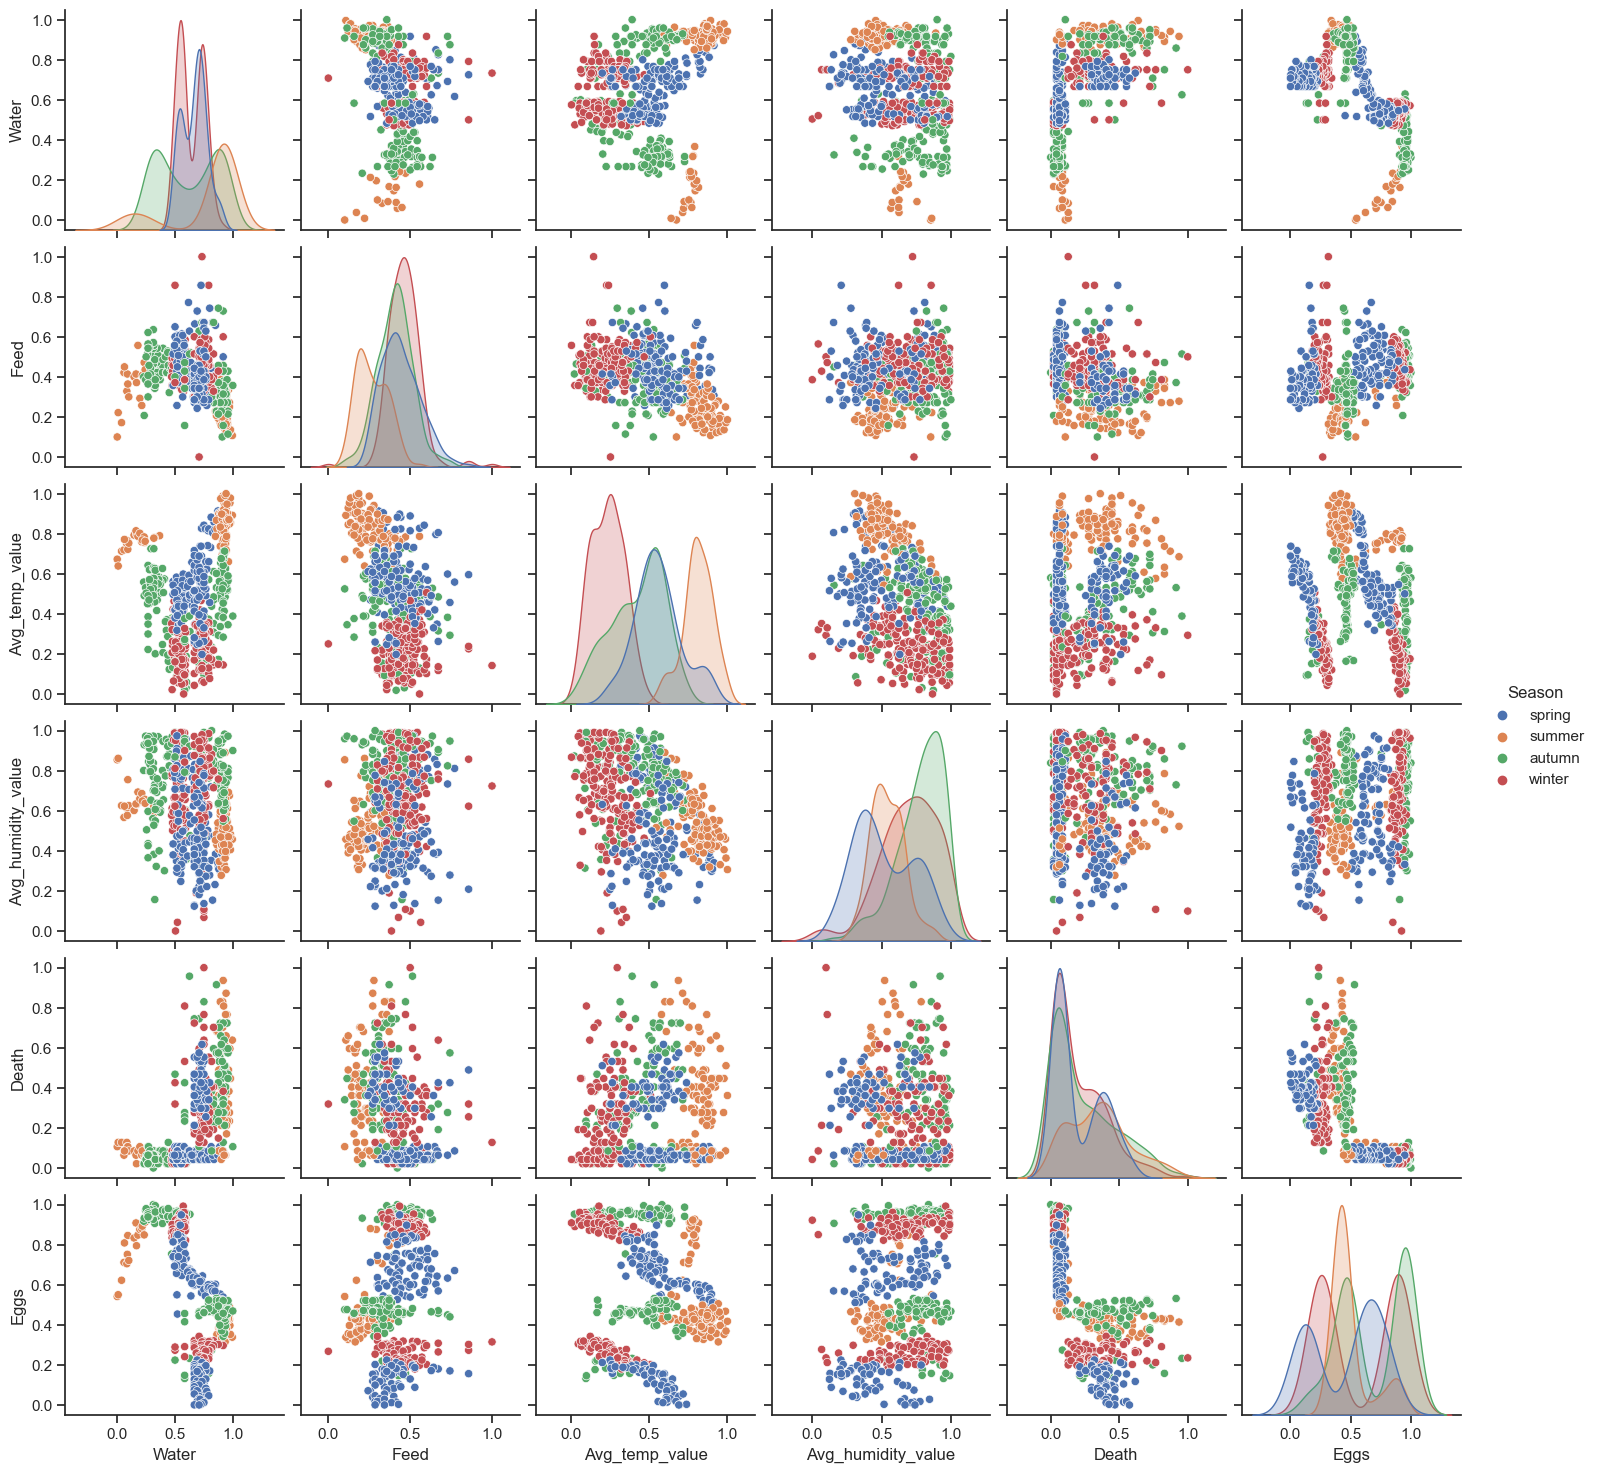

C:\Users\fcami\AppData\Local\Temp\ipykernel_13036\3971686682.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(weather_join_chickens_a[input_features + output_features].corr(), annot=True)


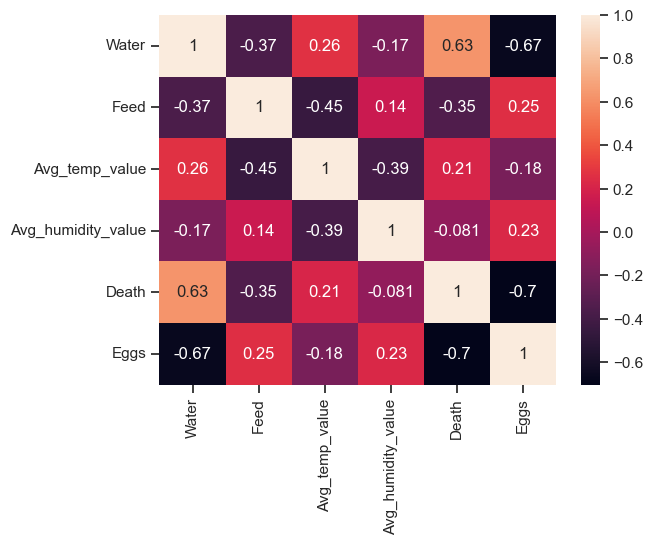

In [48]:
# pair plot cycle A
#norm_a = np.array()
sns.set(style="ticks", color_codes=True)
sns.pairplot(weather_join_chickens_a[input_features + output_features], hue='Season')
plt.show()

# heatmap cycle A
sns.heatmap(weather_join_chickens_a[input_features + output_features].corr(), annot=True)
plt.show()

### Cycle B

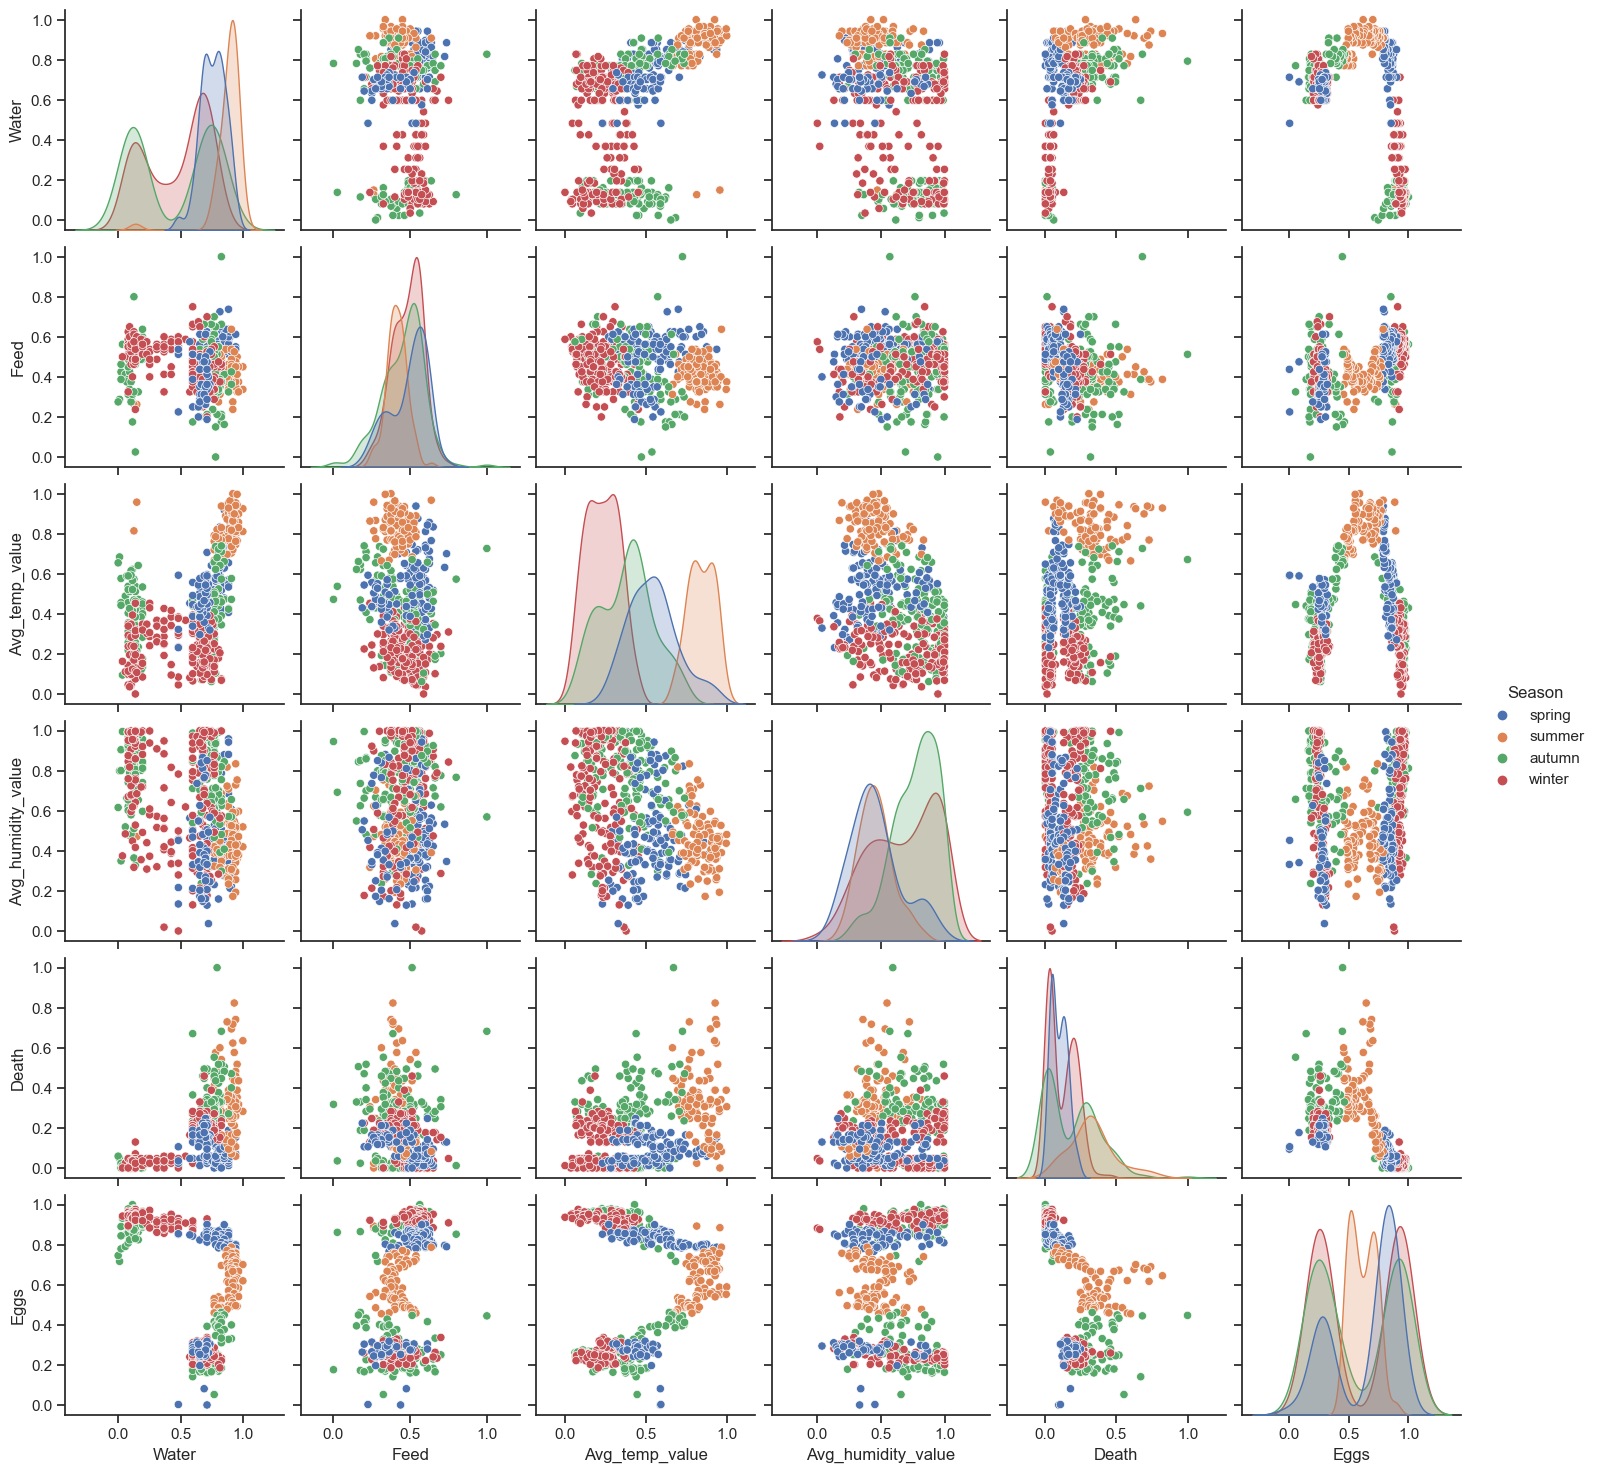

C:\Users\fcami\AppData\Local\Temp\ipykernel_13036\1139925268.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(weather_join_chickens_b[input_features + output_features].corr(), annot=True)


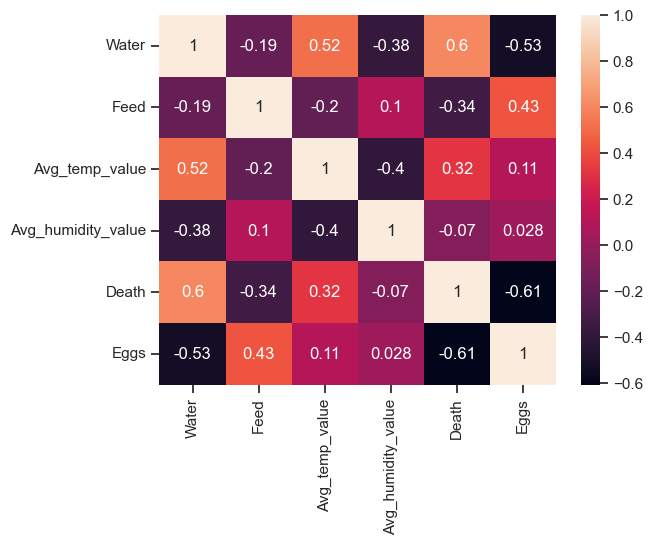

In [49]:
# pair plot cycle B
sns.set(style="ticks", color_codes=True)
sns.pairplot(weather_join_chickens_b[input_features + output_features], hue='Season')
plt.show()

# heatmap cycle B
sns.heatmap(weather_join_chickens_b[input_features + output_features].corr(), annot=True)
plt.show()

### Cycle Z

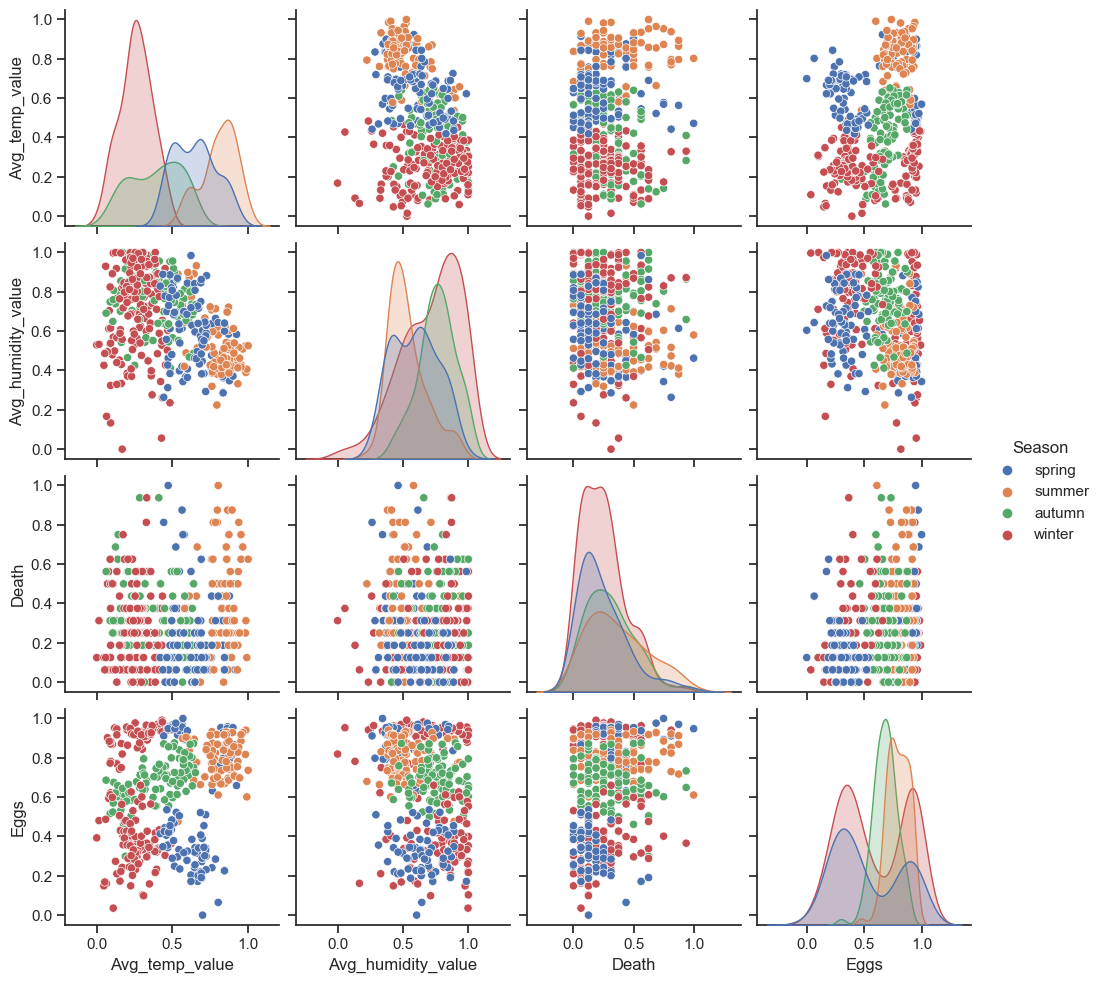

C:\Users\fcami\AppData\Local\Temp\ipykernel_13036\606239845.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(weather_join_chickens_z[input_features_z + output_features].corr(), annot=True)


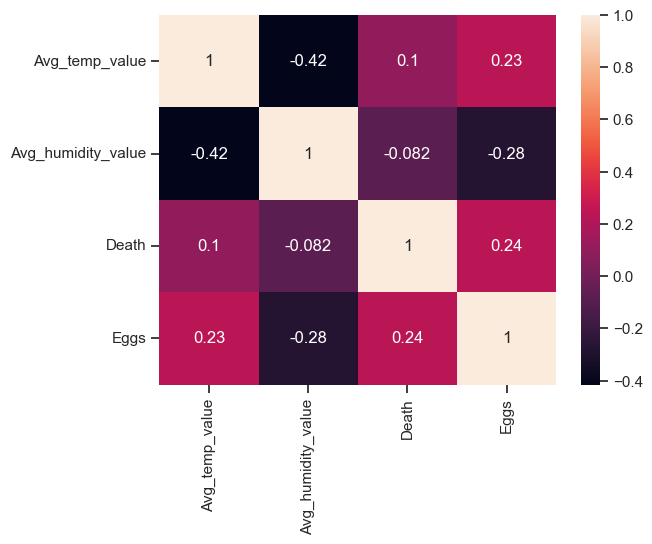

In [50]:
input_features_z = ['Avg_temp_value', 'Avg_humidity_value', 'Season']

# pair plot cycle Z
sns.set(style="ticks", color_codes=True)
sns.pairplot(weather_join_chickens_z[input_features_z + output_features], hue='Season')
plt.show()

# heatmap cycle Z
sns.heatmap(weather_join_chickens_z[input_features_z + output_features].corr(), annot=True)
plt.show()

# Cycle unification - a and b

In [51]:
def add_cycle_ID_column(df: pd.DataFrame, cycle_name: str):
    df['Cycle_ID'] = cycle_name
    return df

a = add_cycle_ID_column(weather_join_chickens_a, 'a')
b = add_cycle_ID_column(weather_join_chickens_b, 'b')

a_b = pd.concat([a, b], axis=0)

a_b

Arrival Chickens Date     Death  Chickens Date of Laid      Eggs  \
0              2018/07/19  0.106383  1.000000   2018/09/01  0.541493   
1              2018/07/19  0.127660  0.998914   2018/09/02  0.550301   
2              2018/07/19  0.127660  0.997829   2018/09/03  0.622624   
3              2018/07/19  0.063830  0.997039   2018/09/04  0.711637   
4              2018/07/19  0.127660  0.995954   2018/09/05  0.705146   
..                    ...       ...       ...          ...       ...   
569            2020/08/09  0.152941  0.005860   2022/04/28  0.274517   
570            2020/08/09  0.164706  0.004159   2022/04/29  0.252510   
571            2020/08/09  0.176471  0.002363   2022/04/30  0.081081   
572            2020/08/09  0.094118  0.001229   2022/05/01  0.000000   
573            2020/08/09  0.105882  0.000000   2022/05/02  0.002317   

        Laied     Water      Feed Date of Selling  \
0    0.334615  0.000000  0.100000             NaN   
1    0.347074  0.008333  0.221429             NaN   
2    0.445629  0.037500  0.171429      2018/09/03   
3    0.566705  0.058333  0.421429             NaN   
4    0.558487  0.083333  0.328571      2018/09/05   
..        ...       ...       ...             ...   
569  0.478958  0.701149  0.500000             NaN   
570  0.445143  0.655172  0.437500             NaN   
571  0.176247  0.689655  0.475000             NaN   
572  0.049045  0.712644  0.437500             NaN   
573  0.053086  0.482759  0.225000      2022/05/02   

     # Eggs sold (First quality)  # Eggs sold (Second quality)        Date  \
0                       0.000000                           0.0  2018/09/01   
1                       0.000000                           0.0  2018/09/02   
2                       0.726347                           0.0  2018/09/03   
3                       0.000000                           0.0  2018/09/04   
4                       0.550037                           0.0  2018/09/05   
..                           ...                           ...         ...   
569                     0.000000                           0.0  2022/04/28   
570                     0.000000                           0.0  2022/04/29   
571                     0.000000                           0.0  2022/04/30   
572                     0.000000                           0.0  2022/05/01   
573                     0.768868                           0.0  2022/05/02   

     Avg_temp_value  Avg_humidity_value  Season Cycle_ID  
0          0.672840            0.854676  summer        a  
1          0.638889            0.861871  summer        a  
2          0.712963            0.625899  summer        a  
3          0.719136            0.566906  summer        a  
4          0.750000            0.612950  summer        a  
..              ...                 ...     ...      ...  
569        0.543974            0.363104  spring        b  
570        0.576547            0.317716  spring        b  
571        0.589577            0.341142  spring        b  
572        0.589577            0.332357  spring        b  
573        0.592834            0.452416  spring        b  

[1196 rows x 16 columns]

## Cycle unification pairplot

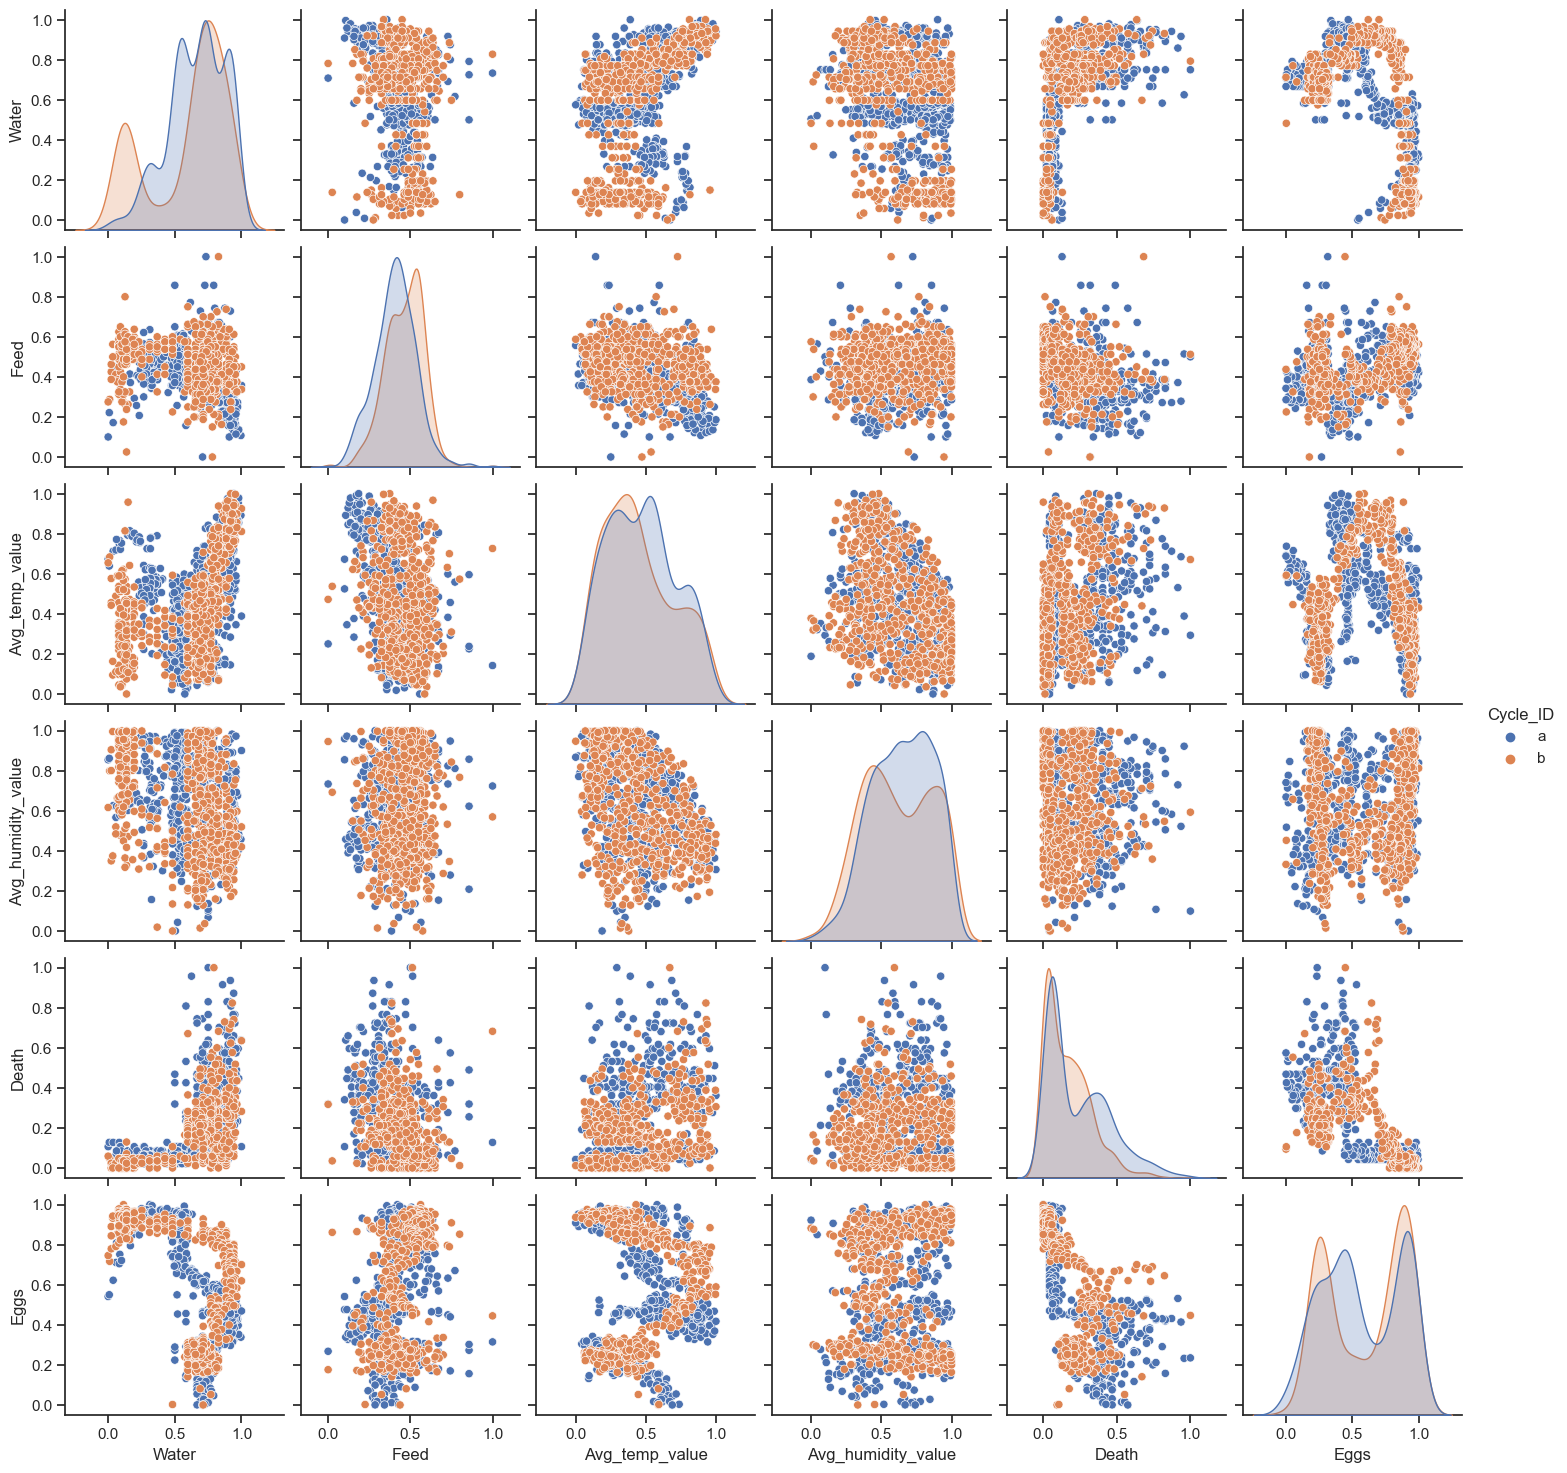

In [52]:
# pair plot
sns.set(style="ticks", color_codes=True)
sns.pairplot(a_b[input_features + output_features + ['Cycle_ID']], hue='Cycle_ID')
plt.show()

## Cycle unification - a and b and z

Since cycle z has missing features these will be deleted.

In [53]:
def add_cycle_ID_column(df: pd.DataFrame, cycle_name: str):
    df['Cycle_ID'] = cycle_name
    return df

a = add_cycle_ID_column(weather_join_chickens_a, 'a')
b = add_cycle_ID_column(weather_join_chickens_b, 'b')
z = add_cycle_ID_column(weather_join_chickens_z, 'z')

a

# a.pop('Water')
# a.pop('Feed')
# a.pop('Water')
# a.pop('Date of Selling')

abz = pd.concat([a, b, z], axis=0)
abz.pop('Water')
abz.pop('Feed')
abz.pop('Date of Selling')
abz

Arrival Chickens Date     Death  Chickens Date of Laid      Eggs  \
0              2018/07/19  0.106383  1.000000   2018/09/01  0.541493   
1              2018/07/19  0.127660  0.998914   2018/09/02  0.550301   
2              2018/07/19  0.127660  0.997829   2018/09/03  0.622624   
3              2018/07/19  0.063830  0.997039   2018/09/04  0.711637   
4              2018/07/19  0.127660  0.995954   2018/09/05  0.705146   
..                    ...       ...       ...          ...       ...   
432            2016/11/17  0.625000  0.007206   2018/05/23  0.191042   
433            2016/11/17  0.312500  0.005114   2018/05/24  0.284943   
434            2016/11/17  0.437500  0.002557   2018/05/25  0.064760   
435            2016/11/17  0.125000  0.001162   2018/05/26  0.226659   
436            2016/11/17  0.062500  0.000000   2018/05/27  0.225580   

        Laied  # Eggs sold (First quality)  # Eggs sold (Second quality)  \
0    0.334615                     0.000000                           0.0   
1    0.347074                     0.000000                           0.0   
2    0.445629                     0.726347                           0.0   
3    0.566705                     0.000000                           0.0   
4    0.558487                     0.550037                           0.0   
..        ...                          ...                           ...   
432  0.242417                     0.000000                           0.0   
433  0.357980                     0.182927                           0.0   
434  0.088437                     0.000000                           0.0   
435  0.287311                     0.182820                           0.0   
436  0.286223                     0.000000                           0.0   

           Date  Avg_temp_value  Avg_humidity_value  Season Cycle_ID  
0    2018/09/01        0.672840            0.854676  summer        a  
1    2018/09/02        0.638889            0.861871  summer        a  
2    2018/09/03        0.712963            0.625899  summer        a  
3    2018/09/04        0.719136            0.566906  summer        a  
4    2018/09/05        0.750000            0.612950  summer        a  
..          ...             ...                 ...     ...      ...  
432  2018/05/23        0.690265            0.862553  spring        z  
433  2018/05/24        0.784661            0.664797  spring        z  
434  2018/05/25        0.802360            0.643759  spring        z  
435  2018/05/26        0.843658            0.600281  spring        z  
436  2018/05/27        0.843658            0.640954  spring        z  

[1633 rows x 13 columns]

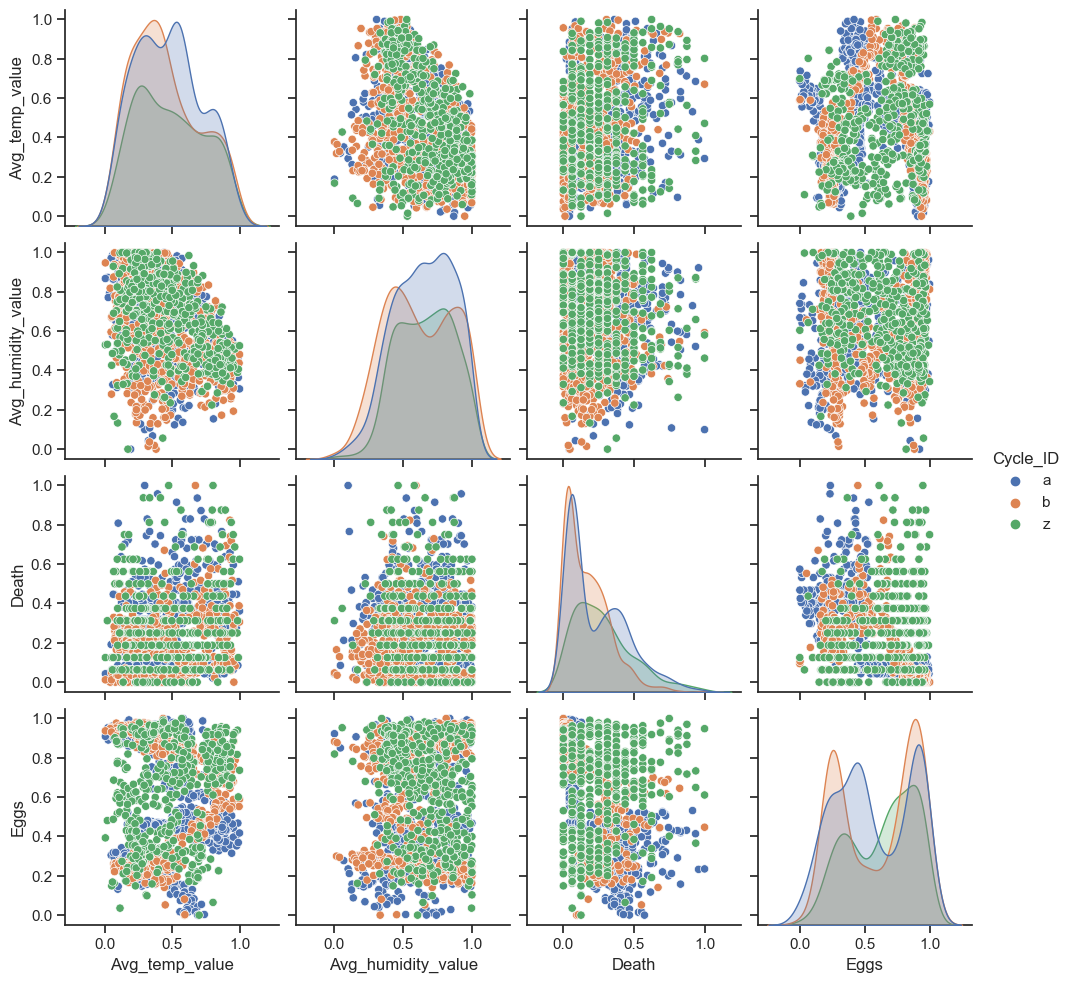

In [54]:
# pair plot

input_features_abz = ['Avg_temp_value', 'Avg_humidity_value', 'Season']
output_features_abz = ['Death','Eggs']

sns.set(style="ticks", color_codes=True)
sns.pairplot(abz[input_features_abz + output_features_abz + ['Cycle_ID']], hue='Cycle_ID')
plt.show()

# Clustering

KeyError: "['Chickens Death Per Day'] not in index"

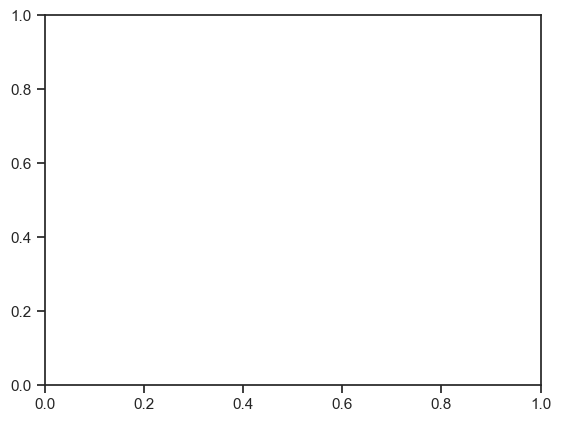

In [55]:
from sklearn.cluster import KMeans

toCluster = ["Season", "Cycle_ID", "Chickens Death Per Day"]

ax=plt.subplot()

# Fit Kmeans for each dataset
model = KMeans(n_clusters=4)                                # 2- hyperparams
model.fit(abz[toCluster])                                   # 3- model fitting (unsupervised, y is not required)
y_predict = model.predict(a_b[toCluster])                   # 4- model testing

# And show the resulting clusters
sns.scatterplot(x=a_b[toCluster].iloc[:, 0], y=a_b[toCluster].iloc[:, 1], hue=y_predict, ax=ax)